In [8]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

%matplotlib inline

### Cleaning up the data

In [3]:
files = ['2009-Inauguration-Records-Raw.csv','2017-Inauguration-Records-Raw.csv','2017-Womens-March-Records-Raw.csv']
cols = ['station', 'event_date', 'type', 'am_peak', 'midday', 'pm_peak', 'env', 'sum']

# Merge the 3 csv's into one
dataFrames = []
for f in files:
    # Remove commas from numeric entries
    df = pd.read_csv('./ridership-data/'+f,thousands=',')
    df.columns=cols

    # Adding 'event_name' column 
    df['event_name'] = ' '.join(f.split('-')[:-2])
    
    # Split event_date column
    df['date'] = map(lambda x: x.split(',')[0],df.event_date)
    df['day'] = map(lambda x: x.split(',')[1],df.event_date)
    
    # Drop event_date column
    df.drop(['event_date'], axis=1, inplace=True)
    
    dataFrames.append(df)
df = pd.concat(dataFrames)

# Merging station names
df.station = map(lambda x: x.replace('/', '-'),df.station)

# Renaming "2017 Womens March" to "2017 Women's March" 
df.event_name = map(lambda x: x.replace("Womens", "Women's"),df.event_name)

# Rearange column order
cols = ['event_name','date','day','station', 'type', 'am_peak', 'midday', 'pm_peak', 'env', 'sum']
df = df[cols]

print(df.info())
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 0 to 183
Data columns (total 10 columns):
event_name    552 non-null object
date          552 non-null object
day           552 non-null object
station       552 non-null object
type          552 non-null object
am_peak       542 non-null float64
midday        542 non-null float64
pm_peak       542 non-null float64
env           542 non-null float64
sum           542 non-null float64
dtypes: float64(5), object(5)
memory usage: 47.4+ KB
None


,event_name,date,day,station,type,am_peak,midday,pm_peak,env,sum
99,2009 Inauguration,1/20/2009,Tue,Medical Center,Exit,259,817,912,288,2276
174,2017 Women's March,1/21/2017,Sat,Wheaton,Entry,2301,2097,435,256,5089
142,2009 Inauguration,1/20/2009,Tue,Spring Hill,Entry,NaN,NaN,NaN,NaN,NaN
19,2009 Inauguration,1/20/2009,Tue,Brookland-CUA,Exit,795,2784,2680,1210,7469
27,2009 Inauguration,1/20/2009,Tue,Clarendon,Exit,448,1053,1573,1208,4282
77,2017 Women's March,1/21/2017,Sat,Greenbelt,Exit,156,1713,11959,4918,18746
121,2009 Inauguration,1/20/2009,Tue,Pentagon City,Exit,1281,5165,6073,3199,15718
96,2009 Inauguration,1/20/2009,Tue,McPherson Sq.,Entry,70,4761,10040,3657,18528
84,2017 Women's March,1/21/2017,Sat,Judiciary Square,Entry,63,5354,9968,358,15743
66,2017 Inauguration,1/20/2017,Fri,Franconia-Springfield,Entry,7169,2334,914,354,10771


### Saving out cleaned CSV's

In [4]:
# Save out clean data excluding 'SYSTEMWIDE TOTAL' rows
stations = df[df.station!='SYSTEMWIDE TOTAL']
stations.to_csv('ridership-data/Inauguration-Womens-March-Records-Clean.csv',index=False)
# Sample a random station
display(stations[stations.station==stations.sample(1).iloc[0]['station']])

,event_name,date,day,station,type,am_peak,midday,pm_peak,env,sum
74,2009 Inauguration,1/20/2009,Tue,Glenmont,Entry,10209,1550,443,362,12564
75,2009 Inauguration,1/20/2009,Tue,Glenmont,Exit,226,2906,3474,1649,8255
74,2017 Inauguration,1/20/2017,Fri,Glenmont,Entry,1885,942,427,244,3498
75,2017 Inauguration,1/20/2017,Fri,Glenmont,Exit,169,804,1498,862,3333
74,2017 Women's March,1/21/2017,Sat,Glenmont,Entry,7166,4548,279,163,12156
75,2017 Women's March,1/21/2017,Sat,Glenmont,Exit,85,1503,7244,1547,10379


In [5]:
# Save out 'SYSTEMWIDE TOTAL' rows as its own csv
totals = df[df.station=='SYSTEMWIDE TOTAL']
totals.to_csv('ridership-data/Inauguration-Womens-March-Totals.csv',index=False)
display(totals)

,event_name,date,day,station,type,am_peak,midday,pm_peak,env,sum
182,2009 Inauguration,1/20/2009,Tue,SYSTEMWIDE TOTAL,Entry,445175,290726,238849,128802,1103552
183,2009 Inauguration,1/20/2009,Tue,SYSTEMWIDE TOTAL,Exit,263865,252376,206571,145877,868689
182,2017 Inauguration,1/20/2017,Fri,SYSTEMWIDE TOTAL,Entry,152138,187133,158393,72893,570557
183,2017 Inauguration,1/20/2017,Fri,SYSTEMWIDE TOTAL,Exit,133477,189043,157869,86865,567254
182,2017 Women's March,1/21/2017,Sat,SYSTEMWIDE TOTAL,Entry,254742,358173,321502,67816,1002233
183,2017 Women's March,1/21/2017,Sat,SYSTEMWIDE TOTAL,Exit,143078,370869,349864,96425,960236


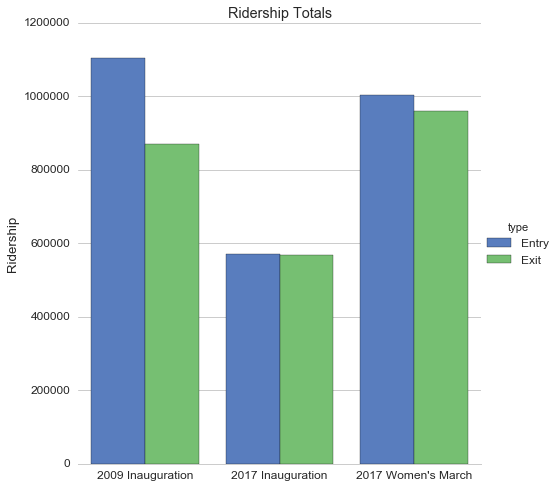

In [9]:
# Plot system wide totals
g = sns.factorplot(x='event_name', y='sum', hue='type', data=totals, size=7, 
                   kind='bar', palette='muted');
g.despine(left=True);
g.set_ylabels('Ridership');
g.set_xlabels('');
sns.plt.title('Ridership Totals');

### Verifying totals

In [7]:
station_sums = pd.DataFrame(stations.groupby(['event_name','type'])['sum'].agg('sum'))
display(station_sums)
display(totals[['event_name','type','sum']])

sum
event_name         type          
2009 Inauguration  Entry  1103552
                   Exit    868689
2017 Inauguration  Entry   570557
                   Exit    567254
2017 Women's March Entry  1002233
                   Exit    960236

,event_name,type,sum
182,2009 Inauguration,Entry,1103552
183,2009 Inauguration,Exit,868689
182,2017 Inauguration,Entry,570557
183,2017 Inauguration,Exit,567254
182,2017 Women's March,Entry,1002233
183,2017 Women's March,Exit,960236
